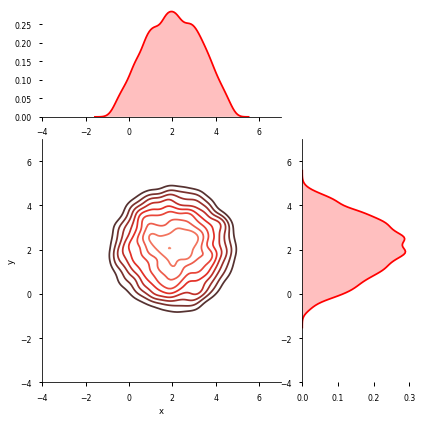

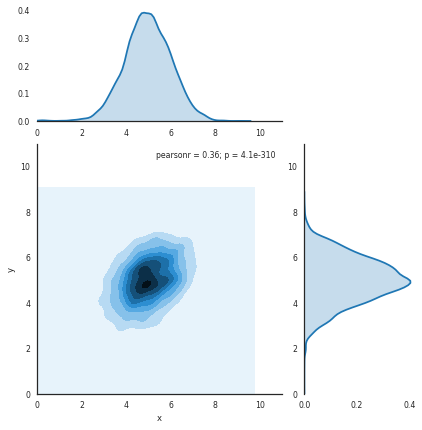

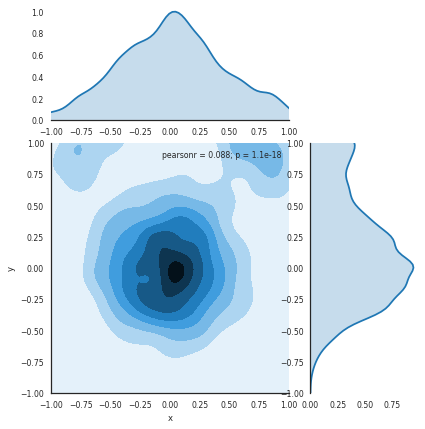

In [19]:
# MCMC, Metropolis w/o Hastings
import numpy as np
import scipy.stats as st 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

def circle(x, y):
    return -(x-2)**2 - (y-2)**2 + 3**2

def deadmaus5(x,y):
    return (x**2+y**2-1)**3-x**2*y**3

def rosenbrock(x, y):
    return np.log(1+(1-x)**2 + 100*(y-x*x)**2)

def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)

def metropolis_hastings(p, iter=100):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_, y_ = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < p(x_, y_) / p(x, y):
            x, y = x_, y_
        samples[i] = np.array([x, y])

    return samples

mus = np.array([5, 5])
sigmas = np.array([[1, 0.35], [0.35, 1]])

#Circle sampling
samples = metropolis_hastings(circle, iter=10000)
data = pd.DataFrame(samples, columns=['x', 'y'])

#trying to set some styles
sns.set_context("notebook", font_scale=0.77)
#with sns.axes_style('white'):
#g=sns.jointplot("x", "y", data, kind="kde", space=0.2, scale=3, color="g", height=1093458760)
# g = sns.JointGrid(x="total_bill", y="tip", data=tips)
    #g.ax_joint.set_xticks([0, 0.34, 0.88]) # main labels
    #g.bx_joint.set_yticks([-0.1, 0.5, 1, 1.1])
g = sns.JointGrid(x="x", y="y", data=data,  xlim=(-4, 7), ylim=(-4, 7), ratio=2) #, height=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)


#Gaussian sampling
samples = metropolis_hastings(pgauss, iter=10000)
data = pd.DataFrame(samples, columns=['x', 'y'])

with sns.axes_style('white'):
    g= sns.jointplot("x", "y", data, kind='kde', xlim=(0, 11), ylim=(0,11), ratio=2);
    
    
#deadmau5 sampling
samples = metropolis_hastings(deadmaus5, iter=10000)
data = pd.DataFrame(samples, columns=['x', 'y'])

with sns.axes_style('white'):
    g= sns.jointplot("x", "y", data, kind='kde', xlim=(-1, 1), ylim=(-1,1), ratio=2);

